In [1]:
from pymongo import MongoClient
import pprint
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
client = MongoClient('db', 27017)
coll = client.nasadb.neo

# Mise en forme et exploration des données

In [3]:
# Aperçu d'un document
coll.find_one()

{'_id': ObjectId('5e1c5241ef061e1438ffd608'),
 'Neo Reference ID': 3723955,
 'Name': 3723955,
 'Absolute Magnitude': 21.3,
 'Est Dia in KM(min)': 0.1460679643,
 'Est Dia in KM(max)': 0.3266178974,
 'Est Dia in M(min)': 146.0679642714,
 'Est Dia in M(max)': 326.6178974458,
 'Est Dia in Miles(min)': 0.090762397,
 'Est Dia in Miles(max)': 0.2029508896,
 'Est Dia in Feet(min)': 479.2256199,
 'Est Dia in Feet(max)': 1071.581062656,
 'Close Approach Date': '1995-01-01',
 'Epoch Date Close Approach': 788947200000,
 'Relative Velocity km per sec': 18.1139850263,
 'Relative Velocity km per hr': 65210.3460948409,
 'Miles per hour': 40519.1731054305,
 'Miss Dist': {'(Astronomical)': 0.3830144627,
  '(lunar)': 148.9926300049,
  '(kilometers)': 57298148,
  '(miles)': 35603420},
 'Orbiting Body': 'Earth',
 'Orbit ID': 21,
 'Orbit Determination Date': '2017-04-06 08:32:49',
 'Orbit Uncertainity': 3,
 'Minimum Orbit Intersection': 0.186935,
 'Jupiter Tisserand Invariant': 5.457,
 'Epoch Osculation': 2

In [4]:
coll.count_documents({})

121862

Le nombre de documents est très supérieur au nombre d'objets supposés connus ([un peu plus de 20 000 aujourd'hui](https://cneos.jpl.nasa.gov/stats/totals.html), et le jeu de données n'est pas récent…).

In [5]:
# on groupe et compte les documents par nom
pipeline = [
    {"$unwind": "$Name"},
    {"$group": {"_id": "$Name", "count": {"$sum": 1}}},
]
pprint.pprint(list(coll.aggregate(pipeline)))

[{'_id': 3476134, 'count': 26},
 {'_id': 3689180, 'count': 26},
 {'_id': 3601666, 'count': 26},
 {'_id': 3762164, 'count': 26},
 {'_id': 2322756, 'count': 52},
 {'_id': 2152742, 'count': 26},
 {'_id': 2011284, 'count': 26},
 {'_id': 3150768, 'count': 52},
 {'_id': 3423027, 'count': 26},
 {'_id': 3758926, 'count': 26},
 {'_id': 3184470, 'count': 78},
 {'_id': 3745995, 'count': 52},
 {'_id': 3329371, 'count': 26},
 {'_id': 2164120, 'count': 26},
 {'_id': 3430405, 'count': 26},
 {'_id': 3174202, 'count': 26},
 {'_id': 3740927, 'count': 26},
 {'_id': 3599302, 'count': 26},
 {'_id': 3387613, 'count': 26},
 {'_id': 3703001, 'count': 26},
 {'_id': 3313733, 'count': 52},
 {'_id': 3711784, 'count': 26},
 {'_id': 2390522, 'count': 26},
 {'_id': 3620671, 'count': 26},
 {'_id': 2163364, 'count': 26},
 {'_id': 3545907, 'count': 26},
 {'_id': 3551168, 'count': 52},
 {'_id': 3547803, 'count': 26},
 {'_id': 2413216, 'count': 26},
 {'_id': 3563857, 'count': 26},
 {'_id': 2096590, 'count': 26},
 {'_id':

 {'_id': 2066146, 'count': 26},
 {'_id': 3702310, 'count': 52},
 {'_id': 3704770, 'count': 26},
 {'_id': 2446833, 'count': 26},
 {'_id': 3701857, 'count': 26},
 {'_id': 2066391, 'count': 52},
 {'_id': 3127399, 'count': 26},
 {'_id': 3469637, 'count': 26},
 {'_id': 3766293, 'count': 26},
 {'_id': 3726013, 'count': 26},
 {'_id': 3773650, 'count': 78},
 {'_id': 3740667, 'count': 26},
 {'_id': 3025766, 'count': 52},
 {'_id': 3092296, 'count': 78},
 {'_id': 3367900, 'count': 26},
 {'_id': 3611400, 'count': 78},
 {'_id': 3716630, 'count': 26},
 {'_id': 3645085, 'count': 26},
 {'_id': 3549640, 'count': 26},
 {'_id': 3013045, 'count': 26},
 {'_id': 3753595, 'count': 26},
 {'_id': 3046122, 'count': 26},
 {'_id': 3454735, 'count': 26},
 {'_id': 3297353, 'count': 26},
 {'_id': 3600234, 'count': 26},
 {'_id': 3618067, 'count': 26},
 {'_id': 3655761, 'count': 78},
 {'_id': 2162694, 'count': 52},
 {'_id': 3172318, 'count': 26},
 {'_id': 3478350, 'count': 26},
 {'_id': 3285073, 'count': 26},
 {'_id':

 {'_id': 3744694, 'count': 26},
 {'_id': 3705044, 'count': 26},
 {'_id': 3589297, 'count': 26},
 {'_id': 3441128, 'count': 26},
 {'_id': 3102756, 'count': 78},
 {'_id': 3736203, 'count': 52},
 {'_id': 3461189, 'count': 26},
 {'_id': 3778653, 'count': 26},
 {'_id': 3344171, 'count': 26},
 {'_id': 3602156, 'count': 26},
 {'_id': 3136736, 'count': 26},
 {'_id': 2086667, 'count': 26},
 {'_id': 3662443, 'count': 26},
 {'_id': 3617715, 'count': 26},
 {'_id': 3626087, 'count': 26},
 {'_id': 3163759, 'count': 26},
 {'_id': 3679434, 'count': 26},
 {'_id': 3742127, 'count': 26},
 {'_id': 3730801, 'count': 26},
 {'_id': 3746620, 'count': 26},
 {'_id': 3714120, 'count': 26},
 {'_id': 3736496, 'count': 26},
 {'_id': 3754386, 'count': 52},
 {'_id': 2204131, 'count': 26},
 {'_id': 3605335, 'count': 26},
 {'_id': 3394074, 'count': 26},
 {'_id': 3743740, 'count': 26},
 {'_id': 3663745, 'count': 26},
 {'_id': 3694462, 'count': 26},
 {'_id': 3752574, 'count': 26},
 {'_id': 3553169, 'count': 26},
 {'_id':

 {'_id': 3633126, 'count': 26},
 {'_id': 2488615, 'count': 26},
 {'_id': 2138947, 'count': 26},
 {'_id': 2459872, 'count': 26},
 {'_id': 3256319, 'count': 26},
 {'_id': 3395961, 'count': 52},
 {'_id': 3266031, 'count': 26},
 {'_id': 3423199, 'count': 26},
 {'_id': 2004034, 'count': 26},
 {'_id': 3426810, 'count': 26},
 {'_id': 3455135, 'count': 26},
 {'_id': 3395986, 'count': 26},
 {'_id': 3512702, 'count': 26},
 {'_id': 3715465, 'count': 26},
 {'_id': 3566697, 'count': 52},
 {'_id': 2141354, 'count': 26},
 {'_id': 3620864, 'count': 26},
 {'_id': 3092345, 'count': 26},
 {'_id': 3613389, 'count': 26},
 {'_id': 3761196, 'count': 52},
 {'_id': 3630638, 'count': 26},
 {'_id': 3102780, 'count': 26},
 {'_id': 3255465, 'count': 26},
 {'_id': 3711174, 'count': 26},
 {'_id': 3758927, 'count': 52}]


En effet il semble que chaque objet ait plusieurs documents associés (multiples de 26 ?).

In [6]:
# on compte le nombre d'objets uniques
pipeline = [
    {"$unwind": "$Name"},
    {"$group": {"_id": "$Name", "count": {"$sum": 1}}},
    {"$group": {"_id": None, "total": {"$sum": 1}}}
]
pprint.pprint(list(coll.aggregate(pipeline)))

[{'_id': None, 'total': 3692}]


Le nombre d'objets uniques est plus cohérent.

In [7]:
# inspection rapide pour voir si les documents associés à un objet sont différents
cursor = coll.find({"Name":2015817},{"Perihelion Distance":1, "_id":0})
pprint.pprint(list(cursor))

[{'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihelion Distance': 1.168187956045972},
 {'Perihel

Après inspection de quelques variables sur quelques objets, il ne semble pas y avoir de grande différence entre les documents pour un même objet. Nous ne conserverons donc qu'un document par objet.

Par ailleurs nous limiterons l'étude aux champs numériques.

In [8]:
# on récupère la liste des clés numériques avec MapReduce
from bson.code import Code
mapper = Code("function() { for (var key in this) { if (typeof(this[key]) == 'number') emit(key, null); } }")
reducer = Code("function(key, stuff) { return null }")
champs_numériques = coll.map_reduce(mapper, reducer, "numeric_keys").distinct("_id")
champs_numériques

['Absolute Magnitude',
 'Aphelion Dist',
 'Asc Node Longitude',
 'Eccentricity',
 'Epoch Osculation',
 'Est Dia in Feet(max)',
 'Est Dia in Feet(min)',
 'Est Dia in KM(max)',
 'Est Dia in KM(min)',
 'Est Dia in M(max)',
 'Est Dia in M(min)',
 'Est Dia in Miles(max)',
 'Est Dia in Miles(min)',
 'Inclination',
 'Jupiter Tisserand Invariant',
 'Mean Anomaly',
 'Mean Motion',
 'Miles per hour',
 'Minimum Orbit Intersection',
 'Name',
 'Neo Reference ID',
 'Orbit ID',
 'Orbit Uncertainity',
 'Orbital Period',
 'Perihelion Arg',
 'Perihelion Distance',
 'Perihelion Time',
 'Relative Velocity km per hr',
 'Relative Velocity km per sec',
 'Semi Major Axis']

In [9]:
# on supprime les doublons et les champs non quantitatifs
champs_numériques.remove('Est Dia in Feet(max)')
champs_numériques.remove('Est Dia in Feet(min)')
champs_numériques.remove('Est Dia in KM(max)')
champs_numériques.remove('Est Dia in KM(min)')
champs_numériques.remove('Est Dia in Miles(max)')
champs_numériques.remove('Est Dia in Miles(min)')
champs_numériques.remove('Est Dia in M(min)') # proportionnel à 'Est Dia in M(max)'
champs_numériques.remove('Name')
champs_numériques.remove('Orbit ID')
champs_numériques.remove('Neo Reference ID')
champs_numériques.remove('Relative Velocity km per hr')
champs_numériques.remove('Miles per hour') # proportionnel à Relative Velocity
champs_numériques.remove('Epoch Osculation') # timestamp
champs_numériques.remove('Orbit Uncertainity')

Certaines données sont angulaires, ce qui nécessiterait un traitement plus approfondi (0° est plus proche de 359° que de 10°). Pour l'exercice, on élimine également ces champs.

In [10]:
champs_numériques.remove('Asc Node Longitude')
champs_numériques.remove('Perihelion Arg')
champs_numériques.remove('Mean Anomaly')

In [11]:
champs_numériques

['Absolute Magnitude',
 'Aphelion Dist',
 'Eccentricity',
 'Est Dia in M(max)',
 'Inclination',
 'Jupiter Tisserand Invariant',
 'Mean Motion',
 'Minimum Orbit Intersection',
 'Orbital Period',
 'Perihelion Distance',
 'Perihelion Time',
 'Relative Velocity km per sec',
 'Semi Major Axis']

In [12]:
# on supprime tous les doublons et on crée un DataFrame avec seulement les champs numériques
pipeline = [
    { "$group": { 
        "_id": "$Name", 
        "doc": { "$first": "$$ROOT" } 
    }},
      { "$replaceRoot": {
        "newRoot": "$doc"
      }}
    
]
cursor = coll.aggregate(pipeline)
df = pd.DataFrame(list(cursor), columns=champs_numériques)
df.shape

(3692, 13)

In [13]:
# normalisation du DataFrame
ndf = (df - df.mean()) / df.std()

In [129]:
# identification des variables équivalentes ou fortement corrélées
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(n=10)

Semi Major Axis              Semi Major Axis                1.000000
                             Orbital Period                 0.995261
Jupiter Tisserand Invariant  Mean Motion                    0.992113
Aphelion Dist                Orbital Period                 0.977822
Semi Major Axis              Aphelion Dist                  0.976173
Jupiter Tisserand Invariant  Semi Major Axis                0.928886
Semi Major Axis              Mean Motion                    0.899917
Orbital Period               Jupiter Tisserand Invariant    0.892304
Aphelion Dist                Jupiter Tisserand Invariant    0.890646
Mean Motion                  Orbital Period                 0.857922
dtype: float64

Il y a de fortes corrélations, nous allons décomposer les données en composantes principales.

Il peut être intéressant de noter également les variables les moins corrélées pour observer l'impact de notre classification :

In [144]:
# identification des variables équivalentes ou fortement corrélées
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().tail(n=3)

Orbital Period       Relative Velocity km per sec    0.014403
Semi Major Axis      Relative Velocity km per sec    0.011190
Perihelion Distance  Perihelion Time                 0.000886
dtype: float64

Ayant un doute sur la pertinence de conserver le temps de passage au périhélie, nous utiliserons le demi grand-axe et la vitesse relative.

# Analyse en composantes principales

In [15]:
# analyse en composantes principales
pca = PCA()
pc = pca.fit_transform(ndf)

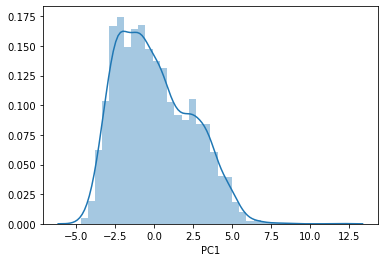

In [16]:
# jetons un œil à la composante principale
sns.distplot(pc[:,0], axlabel="PC1")

C'est moins flagrant pour les autres composantes, mais la composante principale, avec une distribution en somme de deux distributions normales, semble bien augurer d'une classification possible en deux groupes, ce que confirme un plot de densité des deux composantes principales. Les données sont cependant peu différenciées.

<a id='2D_density'></a>

In [89]:
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
f = py.figure_factory.create_2d_density(
    x=pc[:,0],
    y=pc[:,1],
    colorscale=colorscale,
    #hist_color='rgb(255, 237, 222)',
    point_size=3)

f.show()

In [18]:
# pour la lisibilité on passe en pourcentage les inerties
exp_var = pca.explained_variance_ratio_*100
cum_exp_var = np.cumsum(pca.explained_variance_ratio_*100)

In [19]:
# on les affiche
exp_var_plot = dict(
    type = 'bar',
    x = ['PC %s' %i for i in range(1,len(exp_var)+1)],
    y = exp_var,
    name = 'Inertie'
)
cum_exp_var_plot = dict(
    type = 'scatter',
    x = ['PC %s' %i for i in range(1,len(cum_exp_var)+1)],
    y = cum_exp_var,
    name = 'Cumul'
)
py.offline.iplot(
    dict(
        data = [exp_var_plot, cum_exp_var_plot],
        layout = dict(
            title = "Diagramme des éboulis des valeurs propres",
            yaxis = dict(title="Pourcentage de variance expliquée")
        )
    )
)

Les 7 premières composantes principales expliquent à elles seules plus de 96 % de la variance, contre moins de 2 % chacune pour les autres. Selon le critère de Kaiser (variabilité d'une seule variable initiale), on pourrait se limiter aux composantes supérieures à 100/n_var = 100/13 = 7,7 %.

# Classification non supervisée

Nous allons tenter une classification non-supervisée par k-means (les autres algorithmes étant trop gourmands en mémoire pour mon PC), avec plusieurs stratégies :
* d'abord une classification à deux clusters en ne conservant que les trois composantes principales ;
* puis une classification à trois clusters en ne conservant que les trois composantes principales ;
* puis une classification sur toutes les données, pour vérifier que nous ne sommes pas dans un cas où les composantes à faible variance jouent un rôle discriminant important.

## k-means à deux clusters sur les trois composantes principales

In [20]:
ndf_pca = pd.DataFrame(pc[:,0:3]) # np.ndarray to DataFrame

In [21]:
pred = KMeans(n_clusters=2).fit_predict(ndf_pca)

In [22]:
ndf_kmeans = ndf_pca.copy()
ndf_kmeans["pred"] = pred # ajout colonne prédiction

In [23]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ndf_kmeans[ndf_kmeans["pred"]==0][0], name="Groupe 1"))
fig.add_trace(go.Histogram(x=ndf_kmeans[ndf_kmeans["pred"]!=0][0], name="Groupe 2"))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title='Séparation de la composante principale',
    xaxis_title='PC1'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



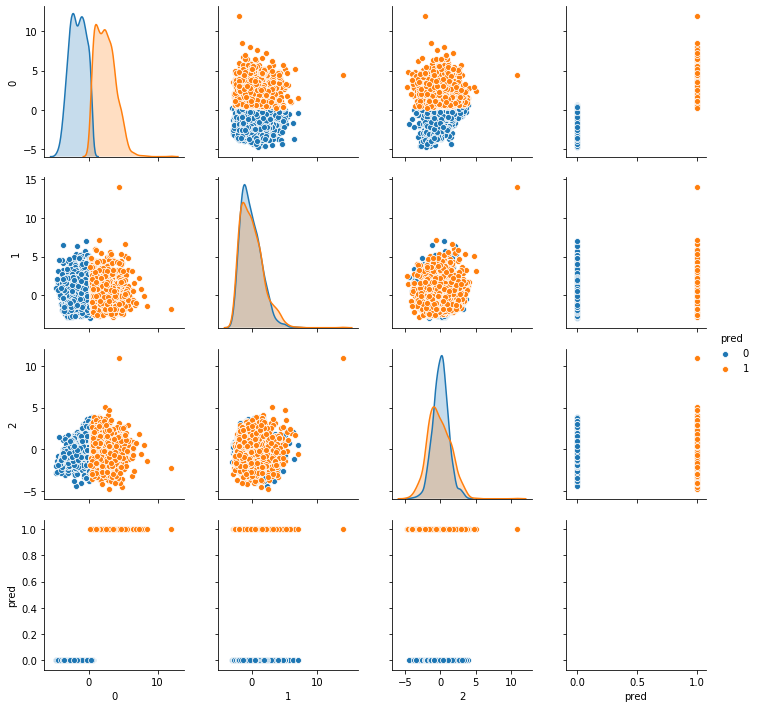

In [24]:
sns.pairplot(ndf_kmeans, hue="pred")

La classification s'opère essentiellement selon la première composante principale, un peu selon la troisième composante principale, et quasiment pas sur la seconde composante principale.

In [141]:
px.scatter(x=ndf_pca.iloc[:,0], y=ndf_pca.iloc[:,1], color=pred, title="Dans l'espace des composantes principales")

In [25]:
# Décomposition des composantes principales selon les variables initiales
print(pd.DataFrame(pca.components_[0:3],columns=ndf.columns,index = ['PC-1','PC-2','PC-3']))

      Absolute Magnitude  Aphelion Dist  Eccentricity  Est Dia in M(max)  \
PC-1           -0.154395       0.409787      0.264137           0.095997   
PC-2           -0.439544      -0.015170      0.257106           0.346824   
PC-3           -0.249457      -0.171491     -0.449130           0.208940   

      Inclination  Jupiter Tisserand Invariant  Mean Motion  \
PC-1     0.029586                    -0.409636    -0.396337   
PC-2     0.411800                     0.078308     0.128804   
PC-3     0.284624                    -0.003582    -0.041540   

      Minimum Orbit Intersection  Orbital Period  Perihelion Distance  \
PC-1                    0.164131        0.409461             0.181367   
PC-2                    0.182830       -0.090334            -0.366689   
PC-3                    0.491223       -0.063584             0.476640   

      Perihelion Time  Relative Velocity km per sec  Semi Major Axis  
PC-1        -0.019706                      0.048444         0.416255  
PC-2   

La première composante principale représente essentiellement, à parts égales, la distance de l'aphélie ("Aphelion Dist"), l'invariant de Tisserand de Jupiter ("Jupiter Tisserand Invariant"), le mouvement moyen ("Mean Motion"), la période orbitale ("Orbital Period") et le demi-axe majeur ("Semi Major Axis").

La seconde composante principale représente essentiellement, à parts relativement proches, la vitesse ("Relative Velocity km per sec"), la magnitude absolue ("Absolute Magnitude"), l'inclinaison ("Inclination"), la distance du périhélie ("Perihelion Distance") et le diamètre ("Est Dia in M(max)").

La troisième composante principale représente essentiellement la distance minimale d'intersection de l'orbite ("Minimum Orbit Intersection"), la distance du périhélie ("Perihelion Distance") et l'excentricité ("Eccentricity").

L'interprétation physique nécessiterait un approfondissement en astronomie, et sera donc laissée de côté pour l'exercice.

Voyons comment s'exerce notre classification sur deux variables corrélées aux deux premières composantes et sur deux des variables les moins corrélées.

In [143]:
px.scatter(df, x=df["Aphelion Dist"], y=df["Relative Velocity km per sec"], color=pred, title="Dans l'espace des données")

In [142]:
px.scatter(df, x=df["Semi Major Axis"], y=df["Relative Velocity km per sec"], color=pred, title="Dans l'espace des données")

La séparation semble pertinente, mais à y regarder de plus près la distribution des vitesses (intervenant essentiellement dans la seconde composante principale, donc non concernée par la classification, cf plus haut) semble composée, ce qui pourrait justifier la classification avec un cluster supplémentaire.

In [84]:
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
f = py.figure_factory.create_2d_density(
    x=df["Aphelion Dist"],
    y=df["Relative Velocity km per sec"],
    colorscale=colorscale,
    point_size=3)

f.show()

## k-means à trois clusters sur les trois composantes principales

Appliquons donc le k-means avec trois clusters.

In [28]:
pred_3 = KMeans(n_clusters=3).fit_predict(ndf_pca)
ndf_kmeans_3 = ndf_pca.copy()
ndf_kmeans_3["pred"] = pred_3 # ajout colonne prédiction
pred_3

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==0][0], name="Groupe 1"))
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==1][0], name="Groupe 2"))
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==2][0], name="Groupe 3"))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title='Séparation de la composante principale',
    xaxis_title='PC1'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

In [30]:
fig = go.Figure()
bins = dict(start=-5, end=12, size=0.1)
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==0][1], name="Groupe 1", xbins=bins))
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==1][1], name="Groupe 2", xbins=bins))
fig.add_trace(go.Histogram(x=ndf_kmeans_3[ndf_kmeans_3["pred"]==2][1], name="Groupe 3", xbins=bins))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title='Séparation de la seconde composante principale',
    xaxis_title='PC2'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.6)
fig.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



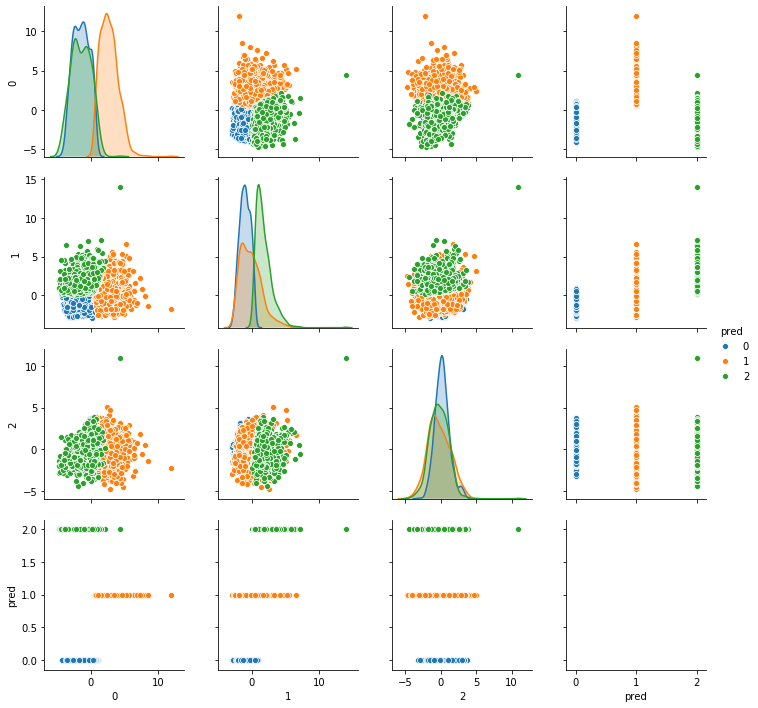

In [31]:
sns.pairplot(ndf_kmeans_3, hue="pred")

In [148]:
px.scatter(df, x=df["Aphelion Dist"], y=df["Relative Velocity km per sec"], color=pred_3, title="Dans l'espace des données")

In [147]:
px.scatter(df, x=df["Semi Major Axis"], y=df["Relative Velocity km per sec"], color=pred_3, title="Dans l'espace des données")

La pertinence de cette classification devrait être évaluée à l'aune de la physique du système solaire, mais la classification tire cette fois profit de la seconde composante principale et semble visuellement efficace et justifiée.

On peut se convaincre que l'utilisation de trois clusters est justifiée en vérifiant le coefficient de silhouette :

In [33]:
for k in range(2,9):
    p = KMeans(n_clusters=k).fit_predict(ndf_pca)
    print("k =", k, ", S_sil =",silhouette_score(ndf_pca, p))

k = 2 , S_sil = 0.3702427794729462
k = 3 , S_sil = 0.29889129965534494
k = 4 , S_sil = 0.2744326026714803
k = 5 , S_sil = 0.2731248159072918
k = 6 , S_sil = 0.26791834010734233
k = 7 , S_sil = 0.26941829942127904
k = 8 , S_sil = 0.26508645468979847


On a bien un optimum du coefficient de silhouette pour `k=3`. Sa valeur est cependant faible, et la relative « platitude » de sa distribution en fonction du nombre de classes invite à la circonspection.

De plus cette distinction n'est valable que dans l'espace des trois composantes principales, et disparaît lorsque l'on calcule le coefficient de silhouette à partir du jeu de données complet. Par ailleurs le meilleur coefficient de silhouette (0.435) est obtenu avec un k-means à deux clusters sur les deux premières composantes principales uniquement.

Il est donc possible voire probable que les catégories ici obtenues soient artificielles.

L'algorithme k-means repose cependant sur des hypothèses contraignantes sur la répartition des données : isotropie, similarité de la taille des clusters… Ce n'est pas forcément le classifieur le plus adapté à notre problème, où rien n'indique que ces conditions sont réunies (au contraire).

Par ailleurs nous avons ignoré dans cette analyse l'influence des données angulaires.

## k-means sur les données non réduites

Il existe des cas où les variables à faible variance ont cependant un fort pouvoir discriminant (cf https://stats.stackexchange.com/questions/101485/examples-of-pca-where-pcs-with-low-variance-are-useful et https://stats.stackexchange.com/questions/87198/low-variance-components-in-pca-are-they-really-just-noise-is-there-any-way-to). Vérifions que ce n'est pas le cas ici, en appliquant l'algorithme k-means sur le jeu de données non réduit.

Pour aller vite, on ne teste que le coefficient de silhouette.

In [34]:
for k in range(2,9):
    p = KMeans(n_clusters=k).fit_predict(ndf)
    print("k =", k, ", S_sil =",silhouette_score(ndf, p))

k = 2 , S_sil = 0.3027003648552434
k = 3 , S_sil = 0.22821007358981837
k = 4 , S_sil = 0.20795608394506193
k = 5 , S_sil = 0.19994617828463798
k = 6 , S_sil = 0.19527244623078607
k = 7 , S_sil = 0.19675335438239933
k = 8 , S_sil = 0.19234950746355028


Les scores très bas et platement distribués confirment l'absence de structure évidente.

## Classification avec les algorithmes DBSCAN et OPTICS

La plupart des algorithmes de classification non-supervisée disponibles dans `scikit-learn` et présentant un intérêt potentiel pour ce sujet (pas de contrainte sur la taille des clusters et l'isotropie des données) sont trop gourmands en mémoire pour pouvoir tourner sur mon PC (problèmes d'allocation).

J'ai cependant pu faire tourner les algorithmes DBSCAN et OPTICS.

### DBSCAN

DBSCAN considère les clusters comme des aires à forte densité séparées par des aires à faible densité. Il n'y a donc pas de contrainte sur leur taille ou l'isotropie des données. L'utilisation de cet algorithme semble d'autant plus pertinent que [cette figure](#2D_density) laisse envisager l'existence de deux zones à densité plus élevée. Il nécessite cependant que les noyaux aient une densité similaire, ce qui n'est pas non plus vraiment notre cas…

In [149]:
from sklearn.cluster import DBSCAN
#dbscan = DBSCAN(eps=1, min_samples=100).fit(ndf_pca)
dbscan = DBSCAN(eps=1, min_samples=30).fit(ndf)

px.scatter(x=ndf_pca.iloc[:,0], y=ndf_pca.iloc[:,1], color=dbscan.labels_)

In [150]:
px.scatter(df, x=df["Semi Major Axis"], y=df["Relative Velocity km per sec"], color=dbscan.labels_, title="Dans l'espace des données")

L'algorithme est très sensible aux paramètres `eps` (taille des noyaux des clusters) et `min_samples` (nombre minimum de points pour former un noyau de cluster). Pour bien faire il faudrait optimiser ces paramètres, mais les varier manuellement (que ce soit sur les données réduites par ACP ou sur les données originales) permet déjà de voir apparaître ou disparaître des clusters peu convaincants, la plupart des points restant catégorisés comme bruit de fond.

On retrouve néanmoins le second cluster conjecturé à [cette étape](#2D_density).

### OPTICS

Pour faire un énorme raccourci, OPTICS est un peu une version améliorée de DBSCAN.

In [151]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

#optics = OPTICS(min_samples=100, min_cluster_size=1).fit(ndf_pca)
optics = OPTICS(min_samples=30, min_cluster_size=1).fit(ndf)

labels = cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=1)

px.scatter(x=ndf_pca.iloc[:,0], y=ndf_pca.iloc[:,1], color=labels)

In [152]:
px.scatter(df, x=df["Semi Major Axis"], y=df["Relative Velocity km per sec"], color=labels, title="Dans l'espace des données")

Comme pour DBSCAN, il est cependant difficile de conclure à la réalité de cette classification, par ailleurs peu satisfaisante au vu de l'énorme quantité de points classés comme du bruit de fond.

# Classification NEO

À titre informatif, les objets géocroiseurs possèdent une classification en fonction de leur demi grand axe, de leur distance au périhélie et de leur distance à l'aphélie : on distingue ainsi les astéroïdes Apollon (Apollos), Aton (Atens), Amor (Amors) et Apohele (Atiras). Cette nomenclature est cependant arbitraire et ne peut donc être inférée directement des données :

In [153]:
a = df["Semi Major Axis"]<1
b = df["Perihelion Distance"]<1.017
c = df["Perihelion Distance"]<1.3
d = df["Aphelion Dist"]<0.983
group = np.ones(df.shape[0])
group[~a & ~b & c] *= 0
group[a & ~d] *= 2
group[a & d] *= 3
px.scatter(df, x=df["Perihelion Distance"], y=df["Semi Major Axis"], color=group)